In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pip install yfinance
import yfinance as yf

Note: you may need to restart the kernel to use updated packages.


In [3]:
start = '2012-01-01'
end = '2022-12-21'

stock = 'GOOG'

data = yf.download(stock, start=start, end=end) # Download data

[*********************100%%**********************]  1 of 1 completed


In [4]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981
...,...,...,...,...,...,...
2022-12-14,95.540001,97.220001,93.940002,95.309998,95.309998,26452900
2022-12-15,93.540001,94.029999,90.430000,91.199997,91.199997,28298800
2022-12-16,91.199997,91.750000,90.010002,90.860001,90.860001,48485500


In [5]:
data.reset_index(inplace=True) # reset the index

In [6]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
1,2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2,2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
3,2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
4,2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981
...,...,...,...,...,...,...,...
2756,2022-12-14,95.540001,97.220001,93.940002,95.309998,95.309998,26452900
2757,2022-12-15,93.540001,94.029999,90.430000,91.199997,91.199997,28298800
2758,2022-12-16,91.199997,91.750000,90.010002,90.860001,90.860001,48485500
2759,2022-12-19,90.879997,91.199997,88.925003,89.150002,89.150002,23020500


In [7]:
ma_100_days = data.Close.rolling(100).mean() # 100 days moving average

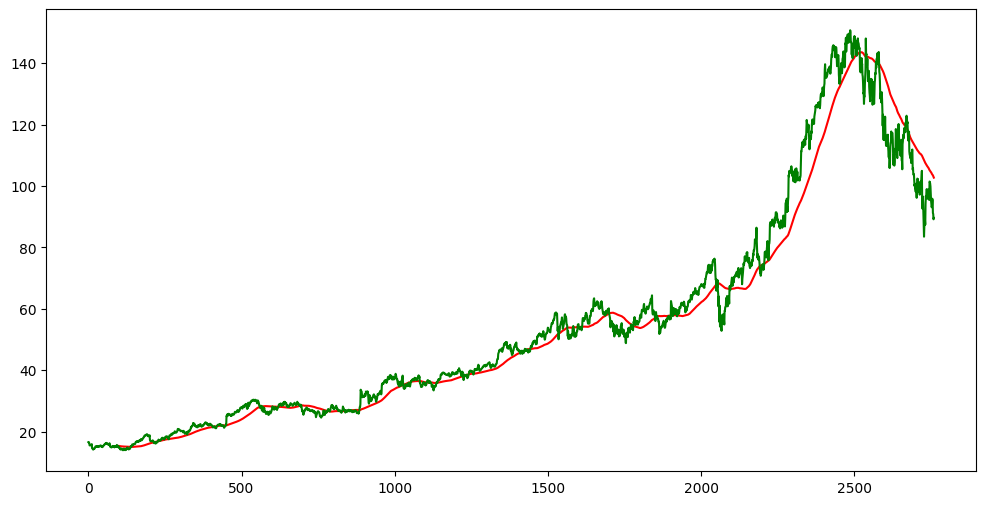

In [8]:
plt.figure(figsize=(12,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [9]:
ma_200_days = data.Close.rolling(200).mean() # 200 days moving average

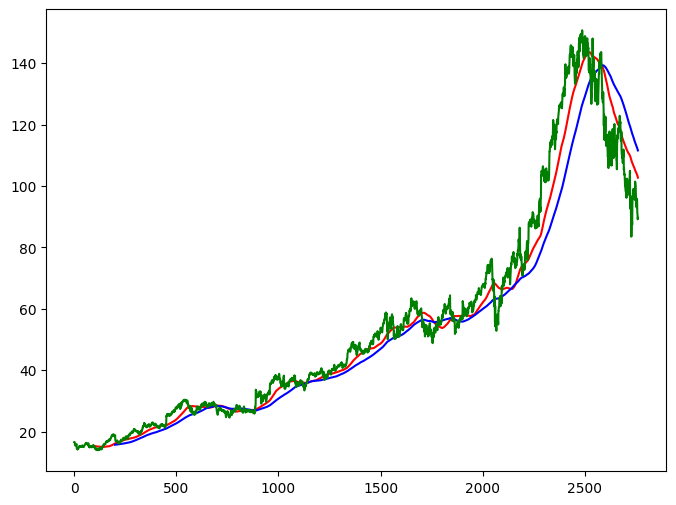

In [10]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days, 'b')
plt.plot(data.Close, 'g')
plt.show()

In [11]:
data.dropna(inplace=True) # drop missing values

In [12]:
data_train = pd.DataFrame(data.Close[0: int(len(data) * 0.80)]) # train data
data_test = pd.DataFrame(data.Close[int(len(data) * 0.80): len(data)]) # test data

In [13]:
data_train.shape[0]

2208

In [14]:
data_test.shape[0]

553

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaller = MinMaxScaler(feature_range=(0,1)) # scale the data

In [16]:
data_train_scaled = scaller.fit_transform(data_train) # scale the train data

In [17]:
x = []
y = []
for i in range(100, data_train_scaled.shape[0]):
  x.append(data_train_scaled[i-100:i])
  y.append(data_train_scaled[i, 0])

In [18]:
x, y = np.array(x), np.array(y)

In [19]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [20]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

d:\miniconda3\envs\myenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [22]:
model.fit(x, y, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 14s 138ms/step - loss: 0.0762
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 126ms/step - loss: 0.0072
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 135ms/step - loss: 0.0068
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 134ms/step - loss: 0.0051
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 128ms/step - loss: 0.0046
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 126ms/step - loss: 0.0047
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 145ms/step - loss: 0.0042
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 133ms/step - loss: 0.0041
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 139ms/step - loss: 0.0041
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 141ms/step - loss: 0.0044
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 137ms/step - loss: 0.0035
Epoch 12/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 141ms/step - loss: 0.0032
Epoch 13/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 133ms/step - loss: 0.0034
Epoch 14/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 133ms/step - loss: 0.0030
Epoch 15/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 132ms/step - 

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [24]:
pas_100_dasys = data_train.tail(100) # last 100 days

In [25]:
data_test = pd.concat([pas_100_dasys, data_test], ignore_index=True) # concatenate the data

In [26]:
data_test_scaled = scaller.fit_transform(data_test) # scale the test data

In [27]:
x = []
y = []
for i in range(100, data_test_scaled.shape[0]):
  x.append(data_test_scaled[i-100:i])
  y.append(data_test_scaled[i, 0])

In [28]:
x, y = np.array(x), np.array(y)

In [29]:
y_predict = model.predict(x)

18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step


In [30]:
scale = 1/scaller.scale_

In [31]:
y_predict = y_predict * scale # scale the prediction

In [32]:
y = y * scale # scale the test data

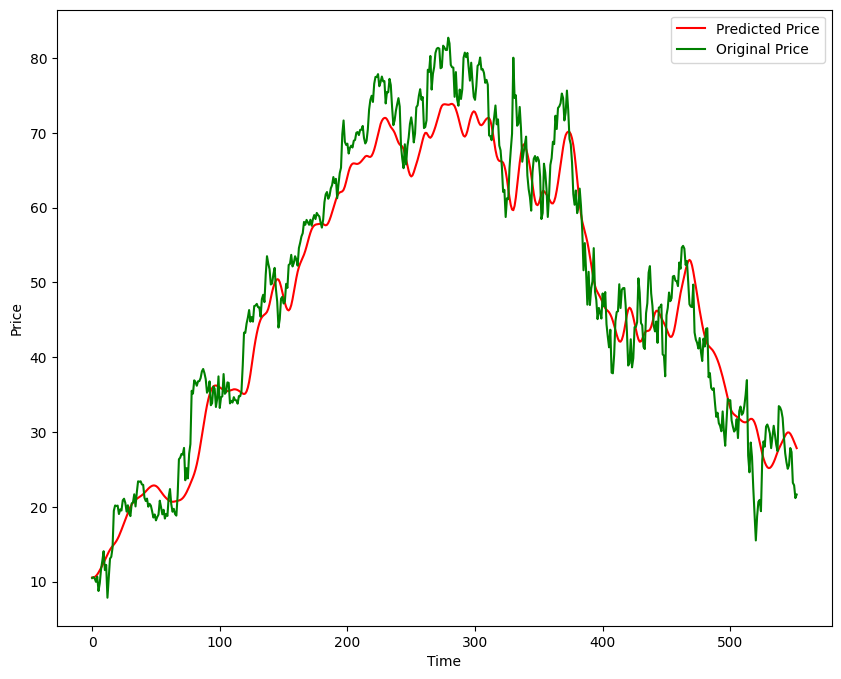

In [33]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label='Predicted Price')
plt.plot(y, 'g', label='Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [34]:
model.save('Stock Predictions Model.keras')